In [590]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb

### Loading Data

In [591]:
covid_data=pd.read_csv('Covid_19 country wide data.csv')
covid_data_age=pd.read_csv('countrywise_age_structure.csv')

In [592]:
covid_data.shape

(6603, 9)

In [593]:
covid_data_age.shape

(213, 4)

In [594]:
covid_data.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [595]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


* Dataset contains float,object and int types

#### Checking for Null values:

In [596]:
covid_data.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

* Except Date,country and population all attributes have null values

In [597]:
covid_data.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


* Min number of total Test conducted at a country are 10 and max 12300740
* Min number of total cases present are 1 and max 1550294
* There are countries where min deaths are 0 and max deaths reaching 100000
* Min numbner of serious/Critical cases are 1 and max are 18671 . Huge gap between 75% and max values.
* Min number of cases recovered are 1 and max 356383 . Huge gap between 75% and max value.
* Min numner of active case in a country is 0 and max 1000000

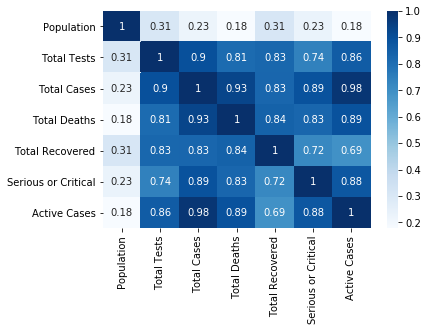

In [598]:
sb.heatmap(covid_data.corr(),annot=True,cmap='Blues')

* No negative correlation in any attribute
* Total Deaths have highest positive correlation with Total Cases
* Total Tests have highest positive correlation with Total Cases
* Recovered cases have highest positive correlation with Total Deaths
* Critical/ Serious cases have highest positive correlation with Total Cases
* Active cases has highest positive correlation with Total Cases

#### Dealing with null values

In [599]:
Covid_data=covid_data.copy()

In [600]:
#######################Dealing with Total Tests #########################
## For countries where Total Tests are null we are filling null values with Total cases as it is assured that  number of covid cases were identified only after testing
### First we are filling null values with -99
Covid_data['Total Tests'].fillna(-99,inplace=True)
for i in range(6603):
    if(Covid_data.iloc[i,3]==-99):
        Covid_data.iloc[i,3]=Covid_data.iloc[i,4]

In [601]:
######################## Dealing with Total Deaths#######################
## First filling null values with -99
Covid_data['Total Deaths'].fillna(-99,inplace=True)
## For Total Deaths we are first implementing the actual formula:- Deaths= Total Cases- Recovered-Active
for i in range(6603):
    if(Covid_data.iloc[i,5]==-99):
        Covid_data.iloc[i,5]=Covid_data.iloc[i,4]-Covid_data.iloc[i,6]-Covid_data.iloc[i,8]

In [602]:
######################## Dealing with Total Recovered#######################
## First filling null values with -99
Covid_data['Total Recovered'].fillna(-99,inplace=True)
## For Total Recovered again  we are  implementing the actual formula:- Recoverd= Total Cases-Deaths-Active
for i in range(6603):
    if(Covid_data.iloc[i,6]==-99):
        Covid_data.iloc[i,6]=Covid_data.iloc[i,4]-Covid_data.iloc[i,5]-Covid_data.iloc[i,8]

In [603]:
######################## Dealing with Active#######################
## First filling null values with -99
Covid_data['Active Cases'].fillna(-99,inplace=True)
## For Total Recovered again  we are  implementing the actual formula:- Active= Total Cases-Deaths-Recovered
for i in range(6603):
    if(Covid_data.iloc[i,8]==-99):
        Covid_data.iloc[i,8]=Covid_data.iloc[i,4]-Covid_data.iloc[i,5]-Covid_data.iloc[i,6]

In [604]:
######################## Dealing with Serious or Critical #######################
## First filling null values with 0
Covid_data['Serious or Critical'].fillna(0,inplace=True)
## We will first find what % of Active cases are serious or Critical and then will then will take the mean of that
df=Covid_data[Covid_data['Active Cases']>0]
p=df['Serious or Critical']/df['Active Cases']
per=p.mean()
for i in range(6603):
    if(Covid_data.iloc[i,7]==0):
        Covid_data.iloc[i,7]=Covid_data.iloc[i,8]*per

In [605]:
Covid_data.isna().sum()

Date                     0
Country                  0
Population               0
Total Tests             49
Total Cases             49
Total Deaths           171
Total Recovered        181
Serious or Critical     49
Active Cases            59
dtype: int64

#### We can see that still there are null values. Dropping rows in which 'Total Tests','Total Deaths,'Total Cases','Total Recovered' ,'Active Cases' and 'Serious or Critical' all attributes are null

In [606]:
df_=Covid_data[(Covid_data['Total Tests'].isna()) & (Covid_data['Total Cases'].isna()) &(Covid_data['Total Deaths'].isna()) & (Covid_data['Total Recovered'].isna()) & (Covid_data['Serious or Critical'].isna()) & (Covid_data['Active Cases'].isna())]
ind=df_.index
Covid_data.drop(ind,axis=0,inplace=True)

In [607]:
Covid_data.isna().sum()

Date                     0
Country                  0
Population               0
Total Tests              0
Total Cases              0
Total Deaths           122
Total Recovered        132
Serious or Critical      0
Active Cases            10
dtype: int64

In [608]:
Covid_data.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,344.0,1559.0,98409.0


In [609]:
Covid_data['Date'].replace(regex=['2020-'],value='',inplace=True)

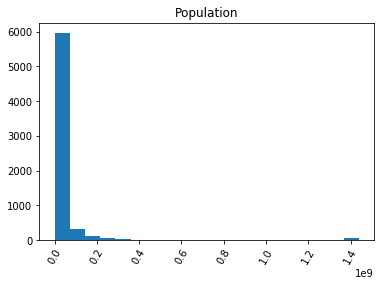

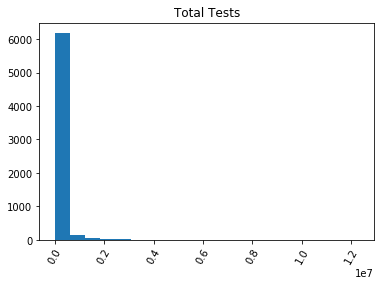

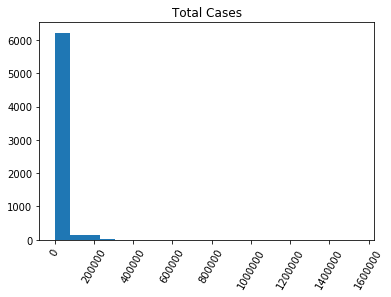

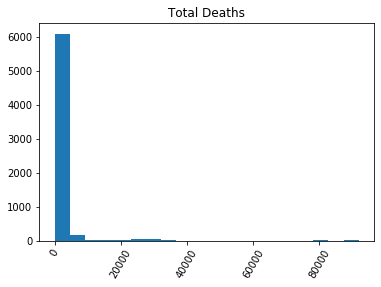

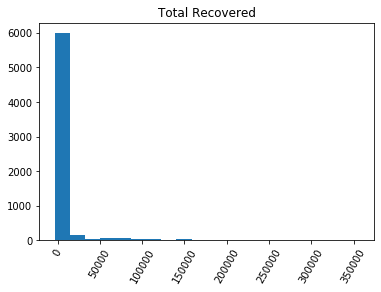

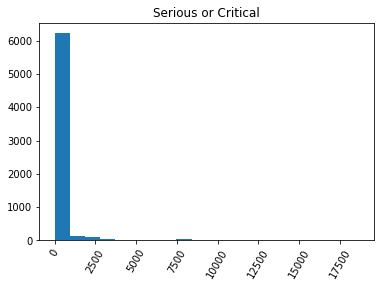

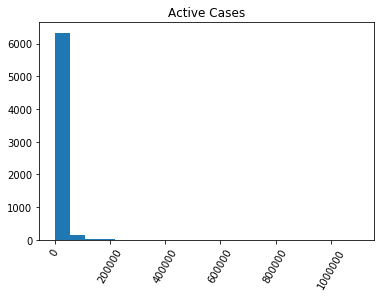

In [610]:
########## Viewing distribution of each attribute
for i in Covid_data.iloc[:,2:].columns:
    plt.subplots()
    plt.hist(x=Covid_data[i],bins=20)
    plt.xticks(rotation=60)
    plt.title(i)

* Most of the population count for countries is between 0.0*10^9 to 0.1*10^9. Some countries have high population of 1.4*10^9
* Most of the Total Tests count for countries is between 0 to 1000000.
* Most of the Total Cases count for countries is between 0 to 100000
* Most of Total Deaths occured are between 0 to 10000
* Most of Total Recoverd cases are between 0 to 25000
* Most of Serious cases are between 0 to 1250
* Most of Active cases are between 0 to 100000

In [619]:
covid_data['Date'].replace(regex=['2020-'],value='',inplace=True)
def view(i,date):
    plt.figure(figsize=(15,5))
    df=covid_data[covid_data['Date']==date]
    df_=df.sort_values(i,ascending=False).head(20)
    plt.xticks(rotation=60)
    sb.barplot(x=df_['Country'],y=df_[i],data=df_)
    print(df.sort_values(i,ascending=False)[['Country',i]].head(1))
    print(df.sort_values(i)[['Country',i]].head(1))

   Country  Population
12   China  1439323776
          Country  Population
199  Vatican City         801


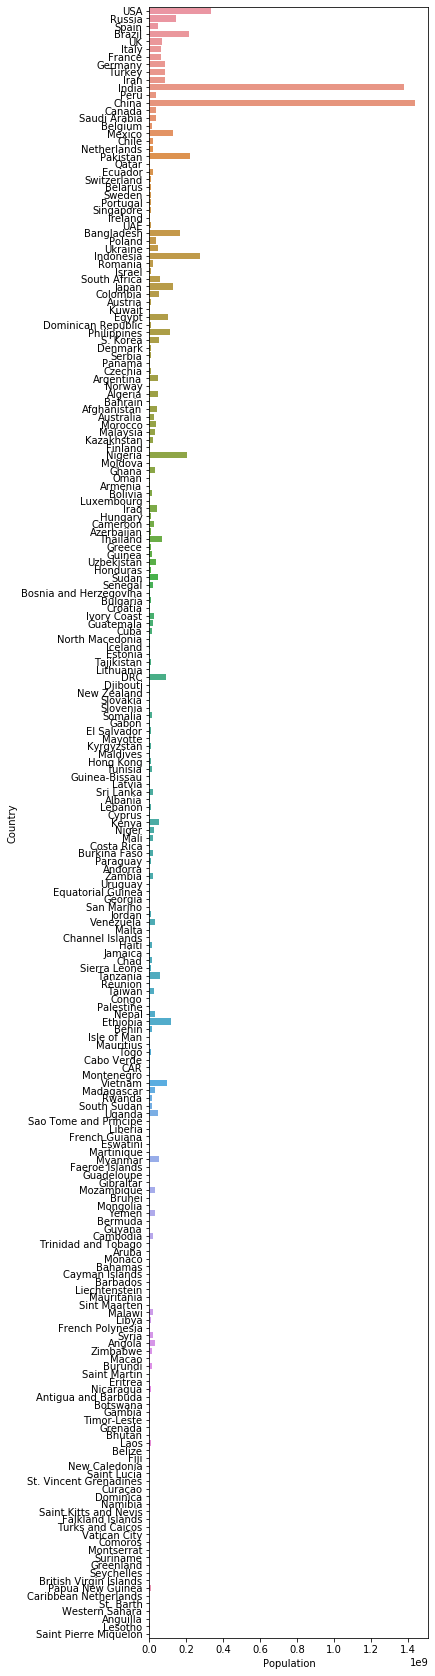

In [621]:
################## Viewing country wise population till date############
plt.figure(figsize=(5,30))
df=covid_data[covid_data['Date']=='04-18']
#plt.xticks(rotation=60)
sb.barplot(y=df['Country'],x=df['Population'],data=df)
print(df.sort_values('Population',ascending=False)[['Country','Population']].head(1))
print(df.sort_values('Population')[['Country','Population']].head(1))

* China has highest population followed by India 
* Vatican city has least population of 801

In [622]:
covid_data.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


     Country  Active Cases
6390     USA     1101930.0
                    Country  Active Cases
6602  Saint Pierre Miquelon           0.0


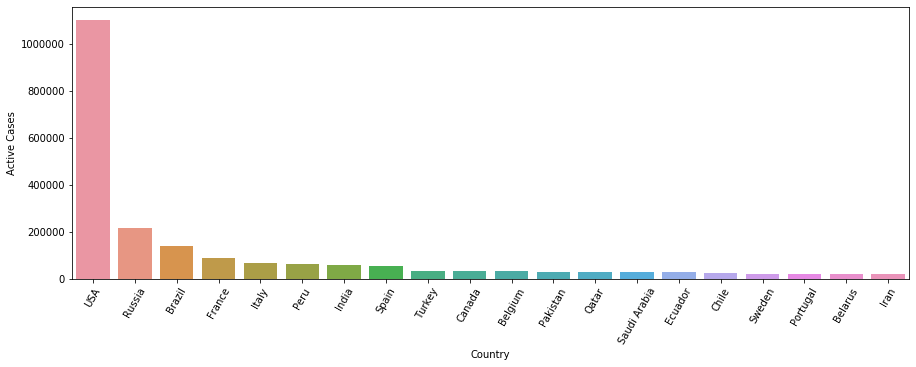

In [623]:
############# Viewing countrywise Active cases till the last time of data collection for top 20 countries###############

view('Active Cases','05-18')

* US have highest Active cases till date crossing 10000000
* Saint Pierre Miquelon has no active cases

     Country  Total Deaths
6390     USA       91981.0
                     Country  Total Deaths
6595  British Virgin Islands           1.0


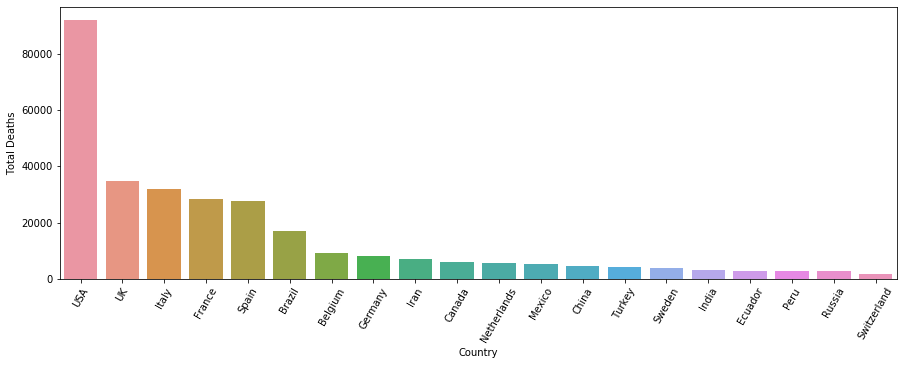

In [624]:
############# Viewing countrywise Total Deaths till the last time of data collection for top 20 countries###############
view('Total Deaths','05-18')

* Highest numnber of Deaths occured in USA followed by UK
* Least numbner of deaths occured in British Virgin Islands

     Country  Total Cases
6390     USA    1550294.0
                    Country  Total Cases
6602  Saint Pierre Miquelon          1.0


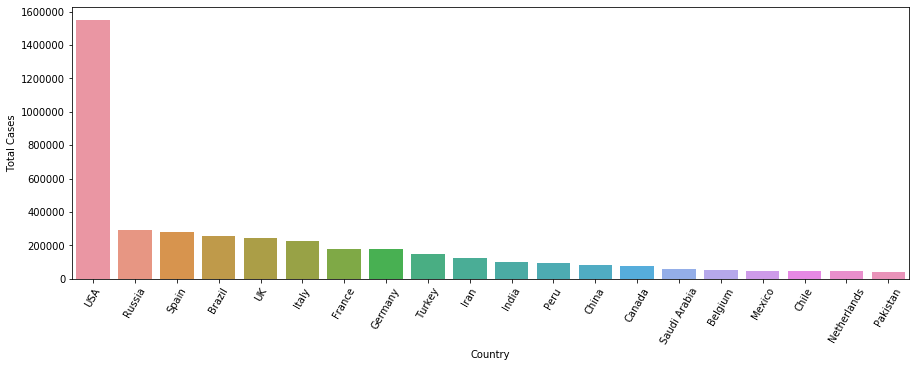

In [625]:
############# Viewing countrywise Total Cases till the last time of data collection for top 20 countries###############
view('Total Cases','05-18')

* USA has highest number of unresolved cases of Covid followed by Russia
* Saint Pierre Miquelon has only 1 case of Covid till now

     Country  Total Recovered
6390     USA         356383.0
                    Country  Total Recovered
6602  Saint Pierre Miquelon              1.0


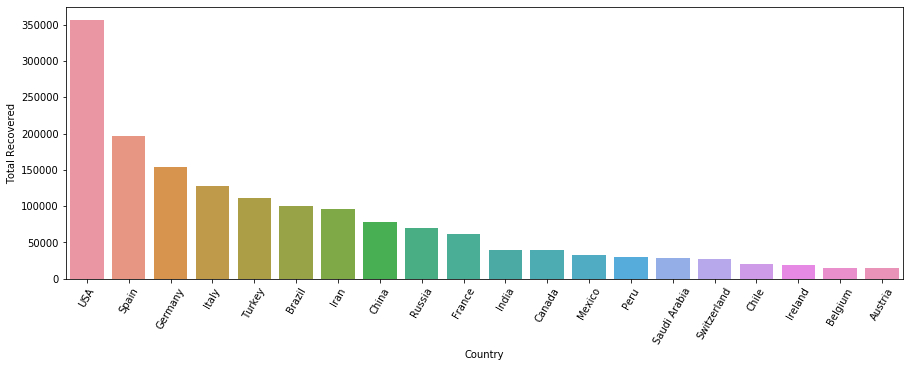

In [626]:
############# Viewing countrywise Total Recovered cases till the last time of data collection for top 20 countries###############
view('Total Recovered','05-18')

* Recovery rate of USA is highest followed by Spain
* Saint Pierre Miquelon had only 1 case of covid and that too is recovered

     Country  Total Tests
6390     USA   12300744.0
         Country  Total Tests
6591  Montserrat         36.0


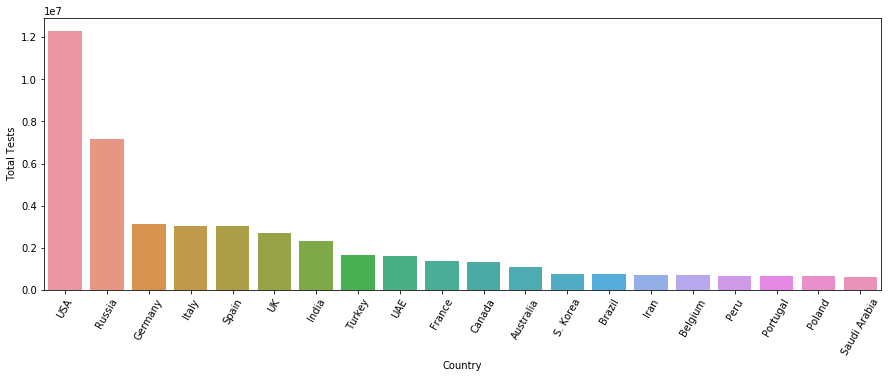

In [627]:
############# Viewing countrywise TotalTest Conducted till the last time of data collection for top 20 countries###############
view('Total Tests','05-18')

* Testing rate is highest in USA followed by Russia
* Least people (36) were tested in Montserrat

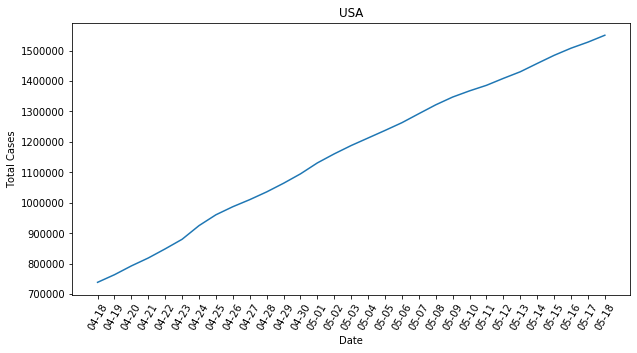

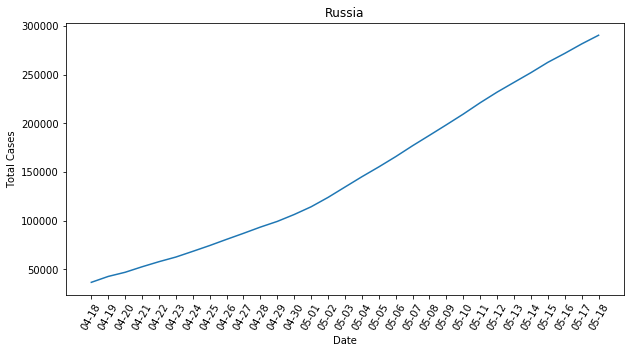

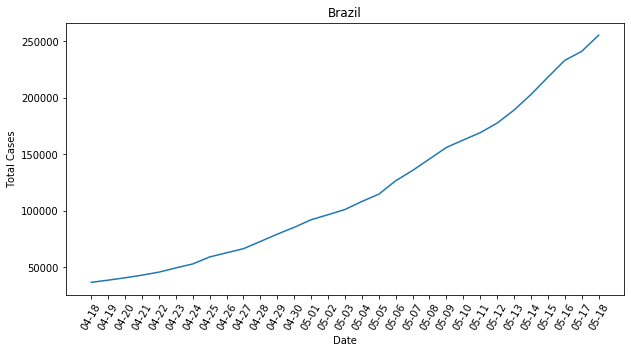

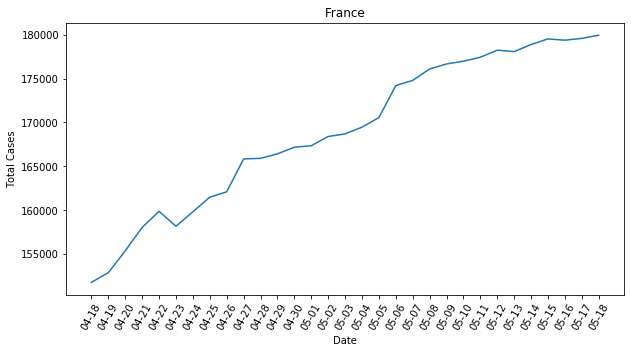

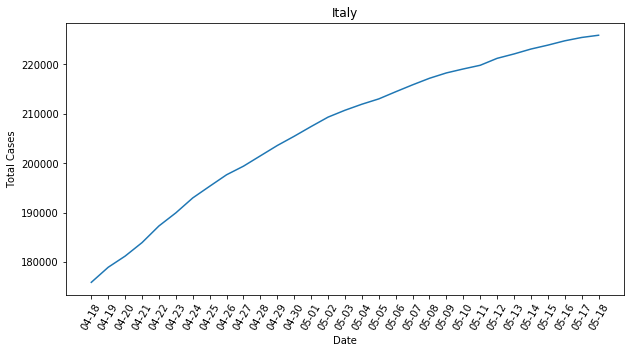

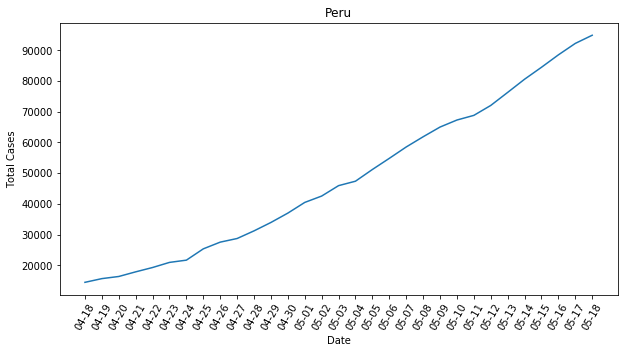

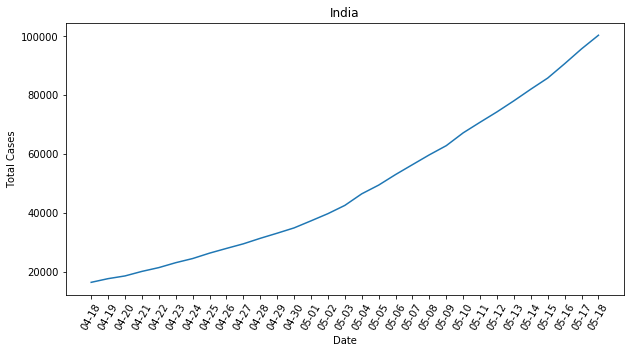

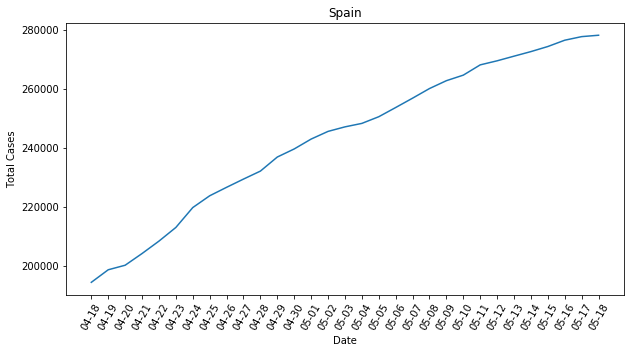

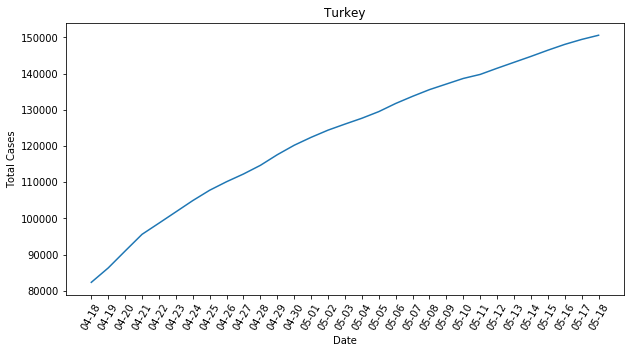

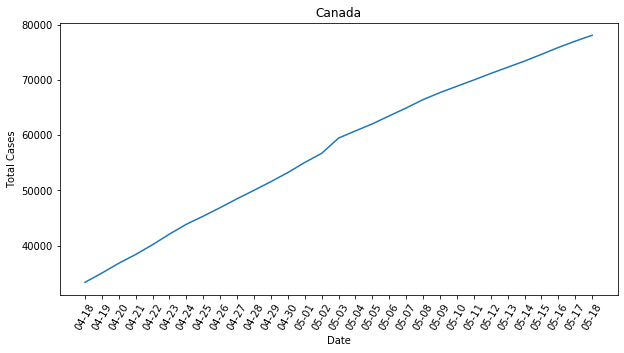

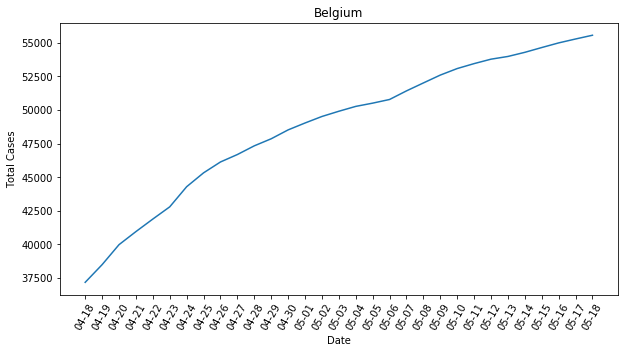

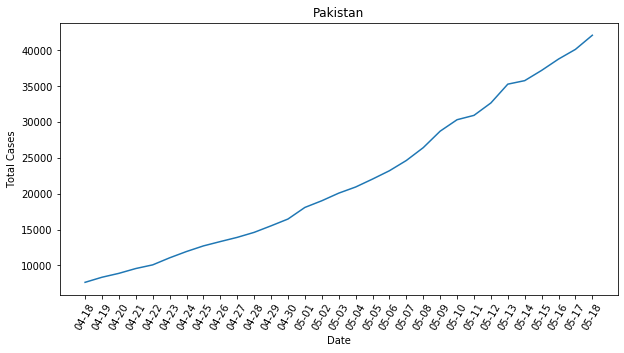

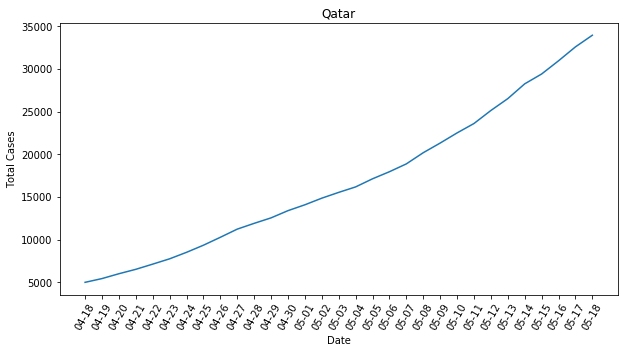

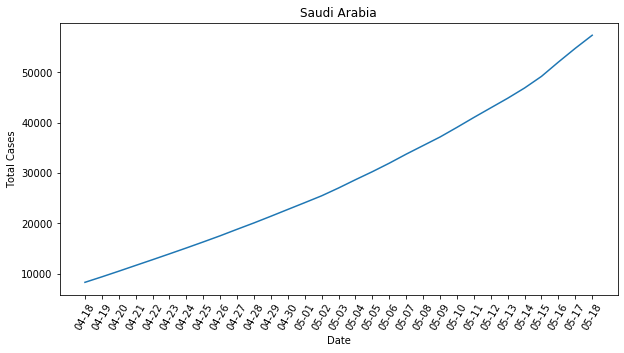

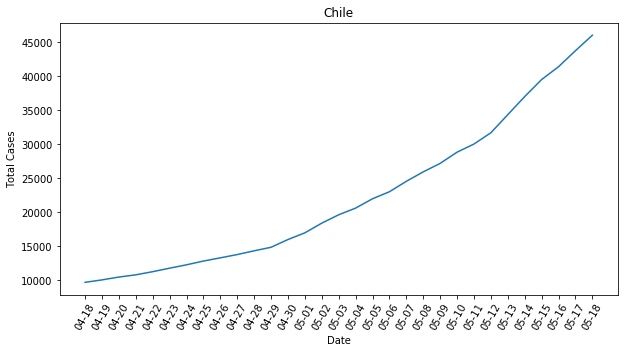

In [628]:
####################### Timely view of increasing cases per country for top 15 affected countries########################
coun=['USA','Russia','Brazil','France','Italy','Peru','India','Spain','Turkey','Canada','Belgium','Pakistan','Qatar','Saudi Arabia','Chile']
for i in coun:
    df_=covid_data[covid_data['Country']==i]
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=60)
    plt.title(i)
    sb.lineplot(x='Date',y='Total Cases',data=df_)

* Cases are increasing almost linearly in USA,Russia,Canada
* Cases are increasing Exponential  in Brazil,Italy,India,Pakistan,QatarSaudi Arabia,Chile

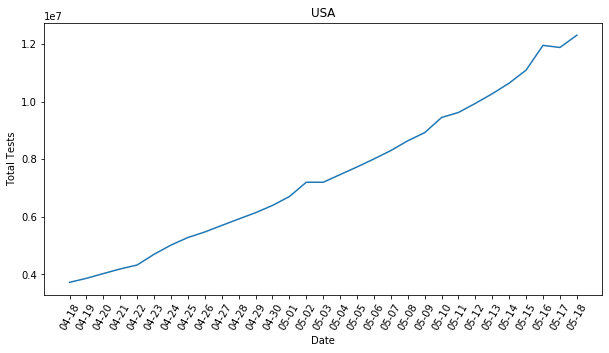

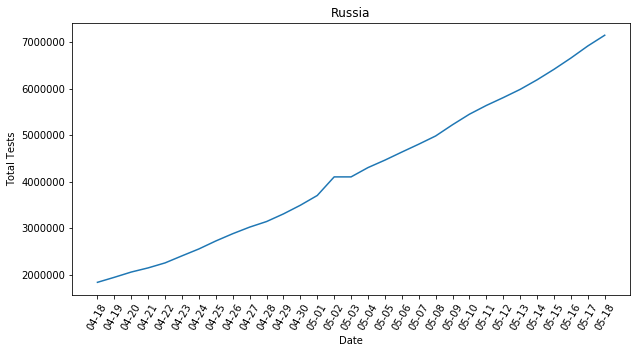

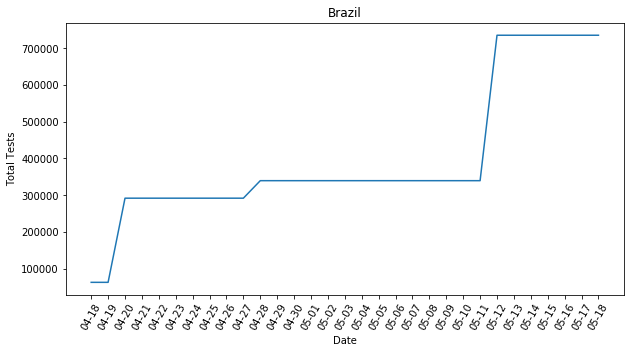

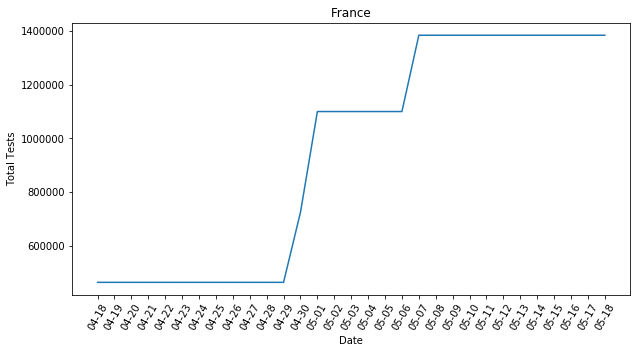

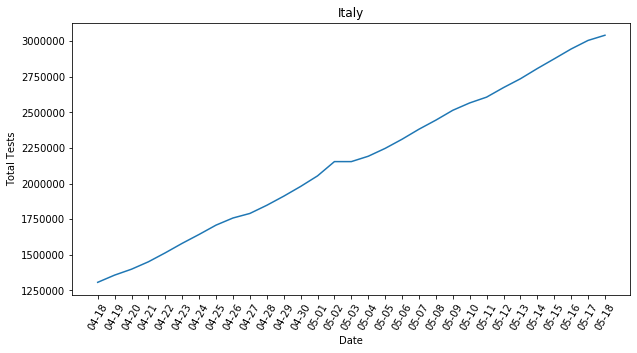

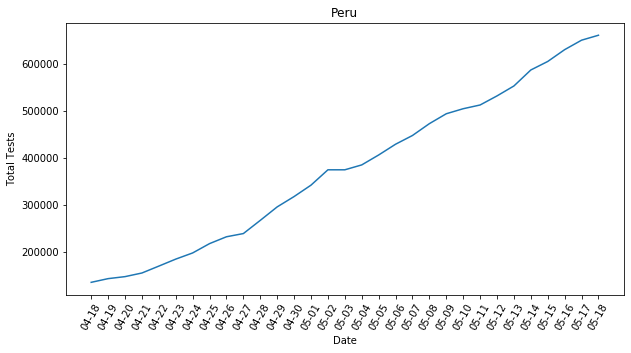

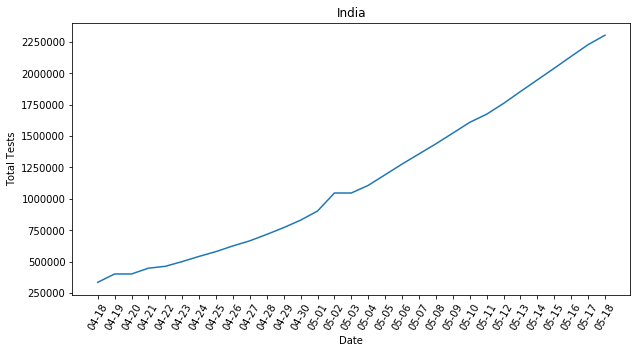

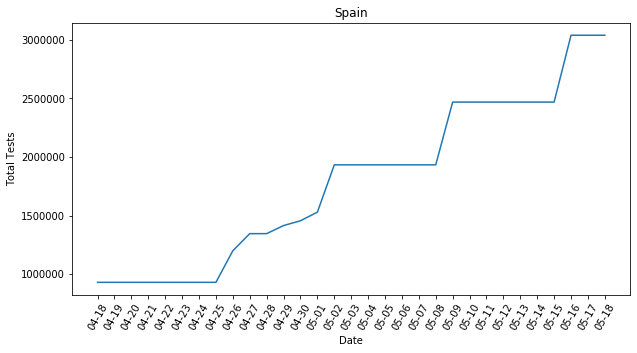

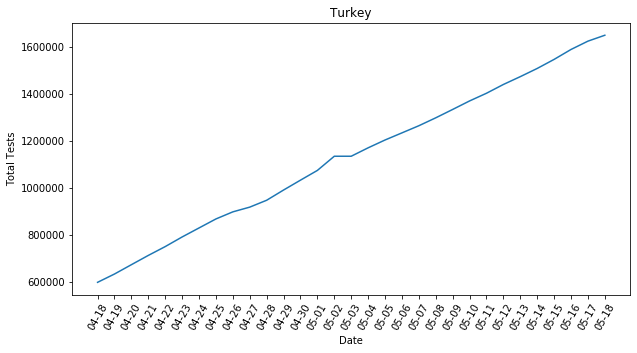

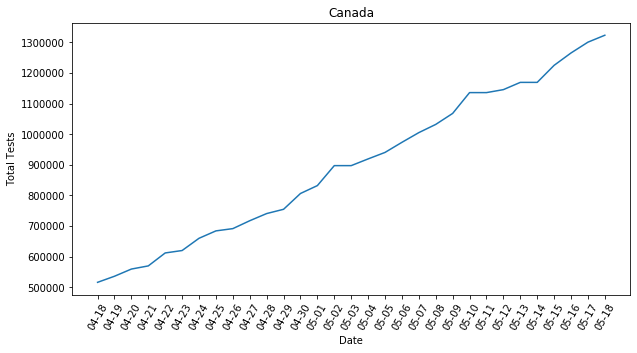

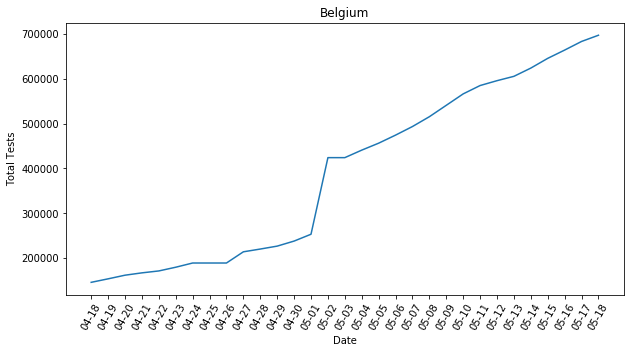

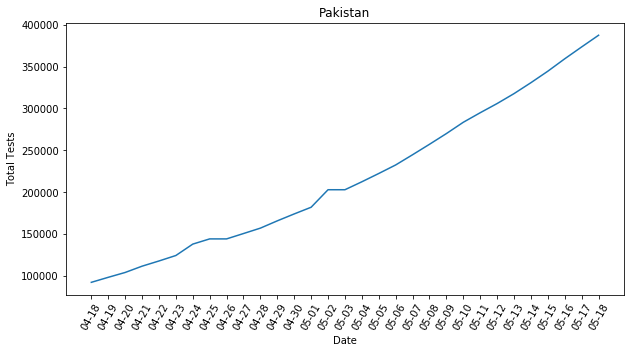

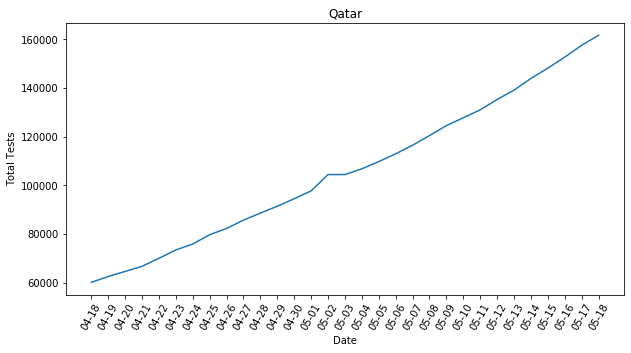

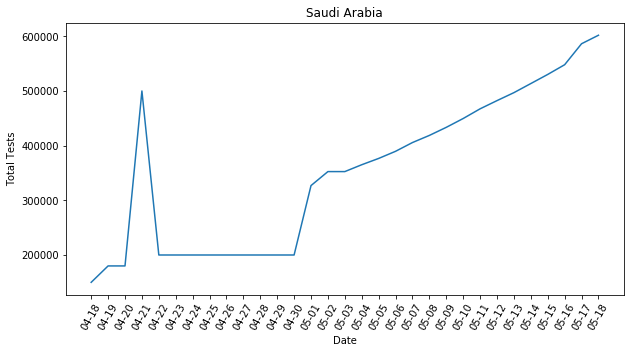

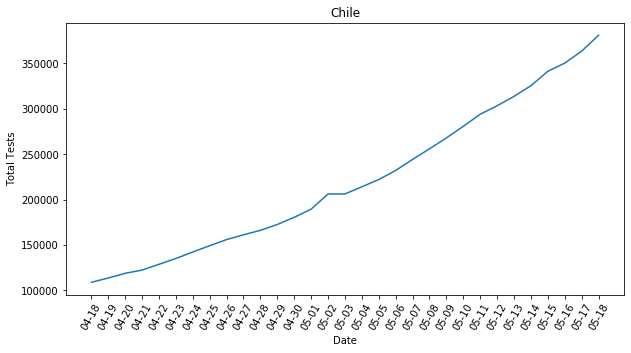

In [629]:
################### Timely view  of test performance of each country #############################
for i in coun:
    df_=covid_data[covid_data['Country']==i]
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=60)
    plt.title(i)
    sb.lineplot(x='Date',y='Total Tests',data=df_)

* Total tests Performed in USA are linear with respect to time
* In Brazil we can see there were almost no tests performed from  04-20 to 05-11
* In France there were no test performed from 04-18 to 04-29
* Its good that there are countries where the curve is exponential like India,Chile
* In Saudi Arabia there were a huge test performed on 04-21 and after 04-30 test number is increasing linearly
* Beligium increased there test rate after 05-02
* Test rate is incrasing in a zig zag manner in Belgium

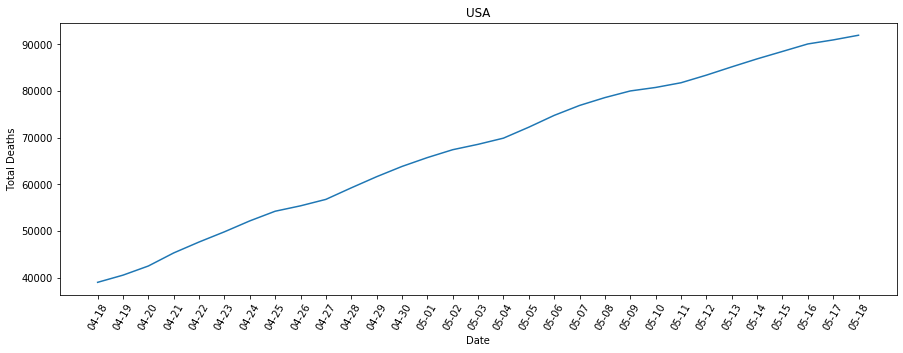

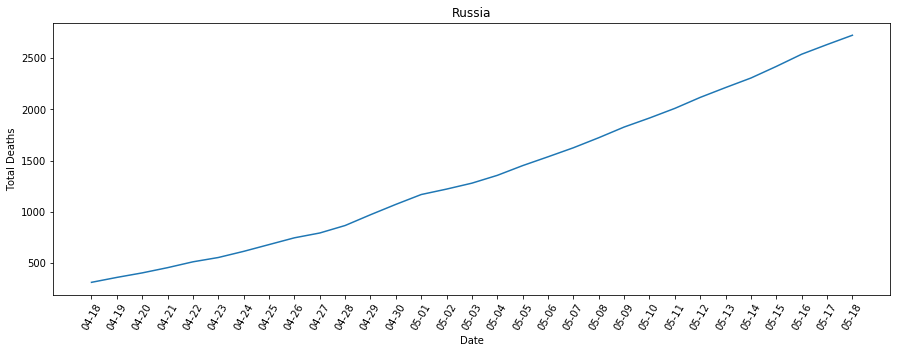

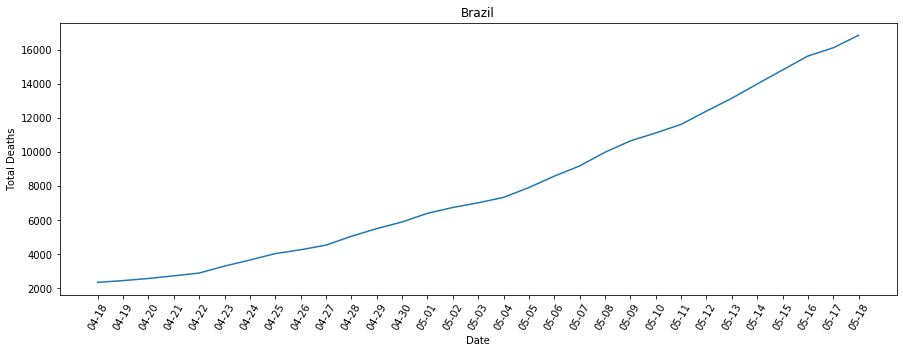

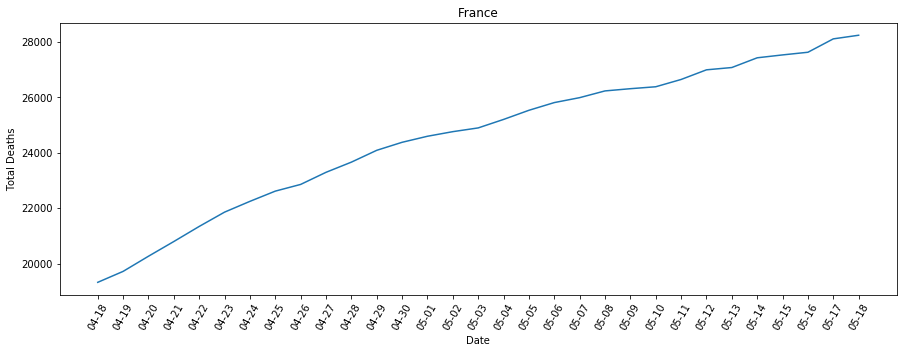

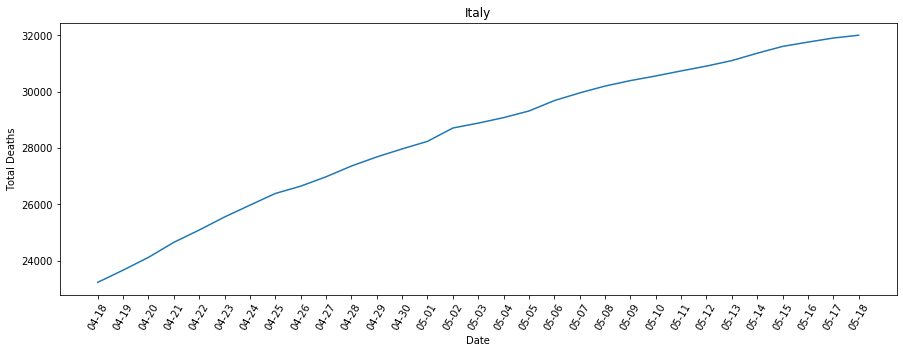

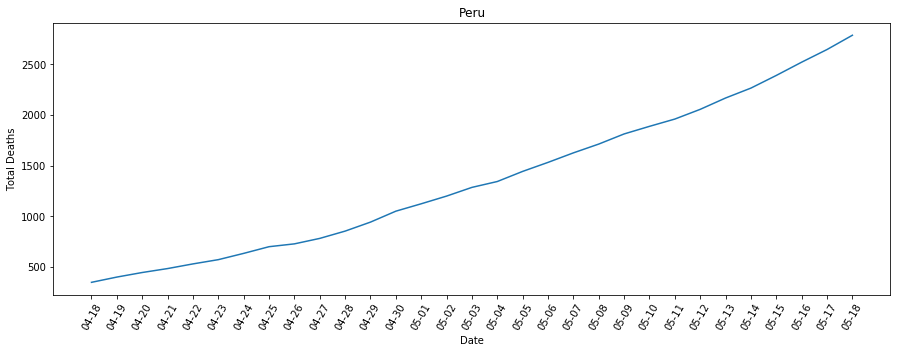

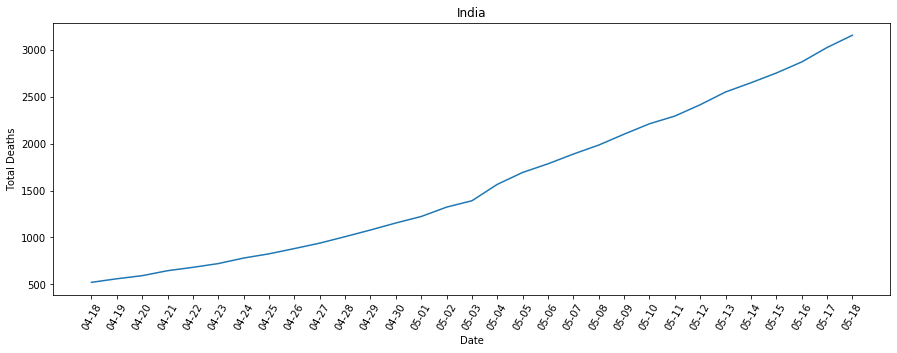

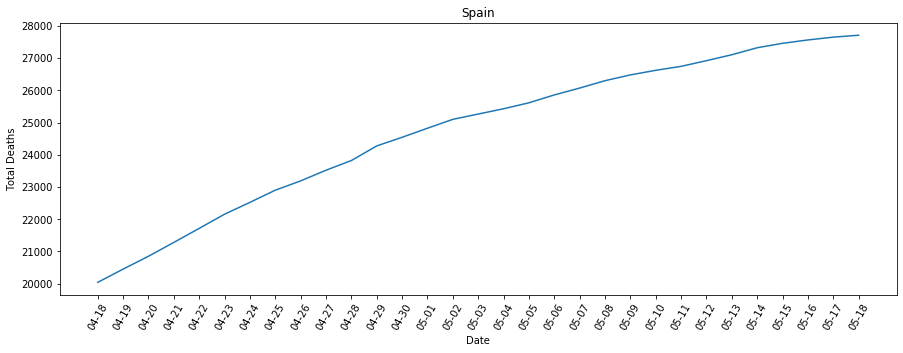

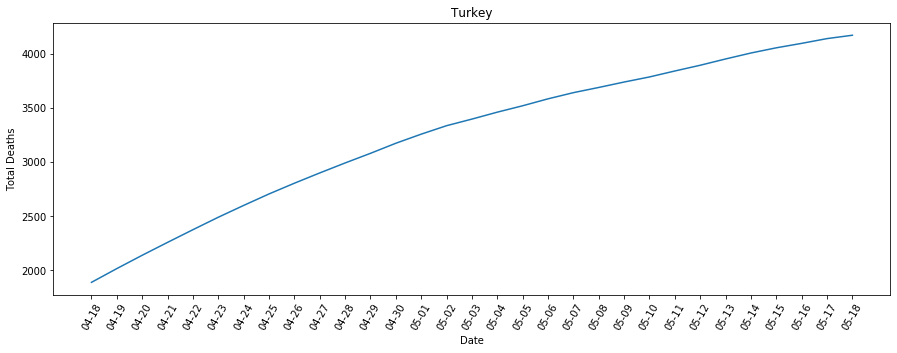

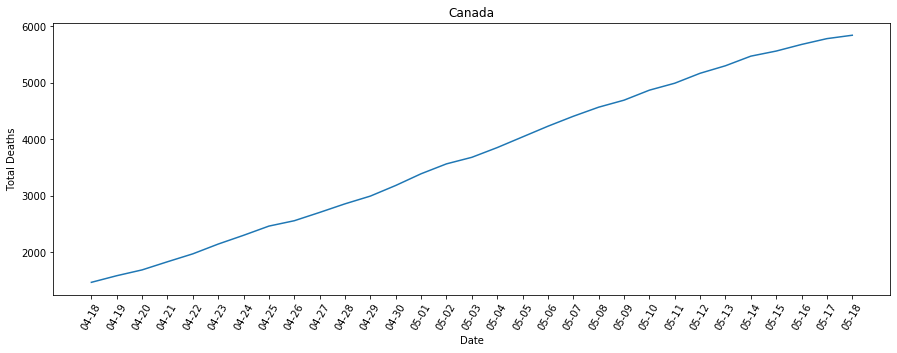

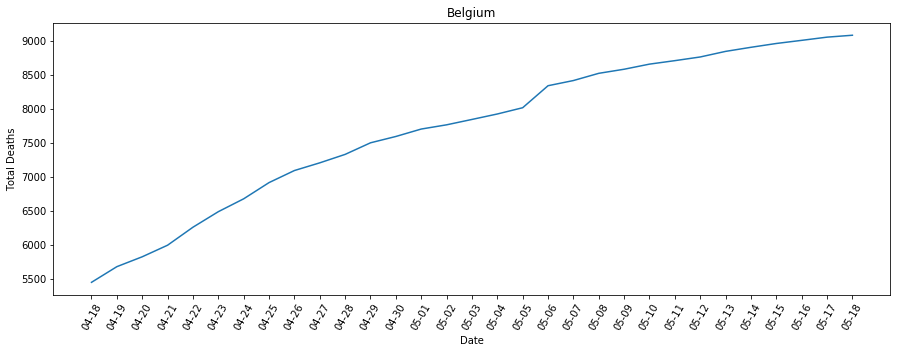

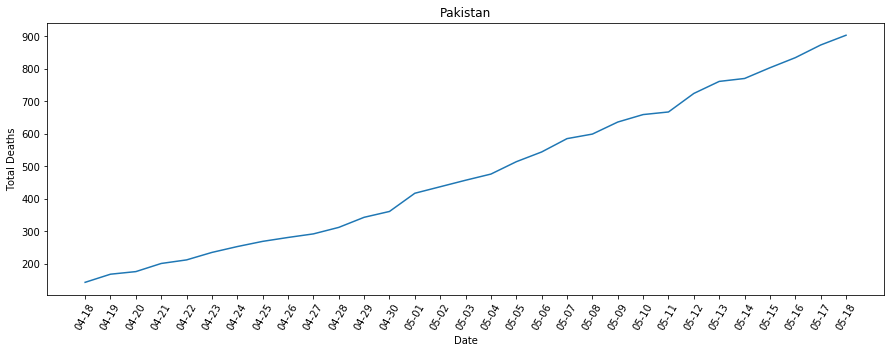

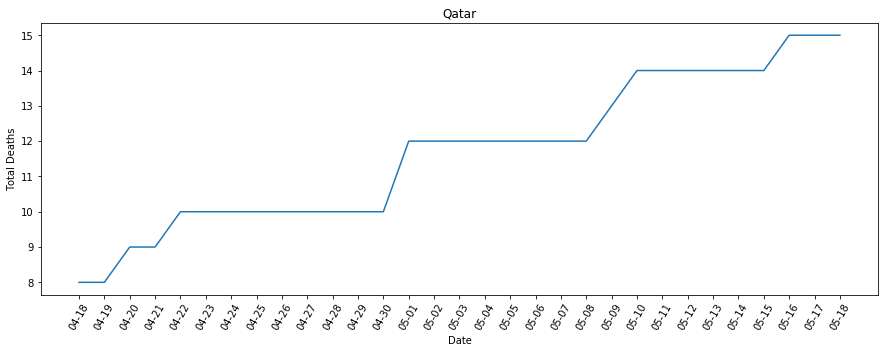

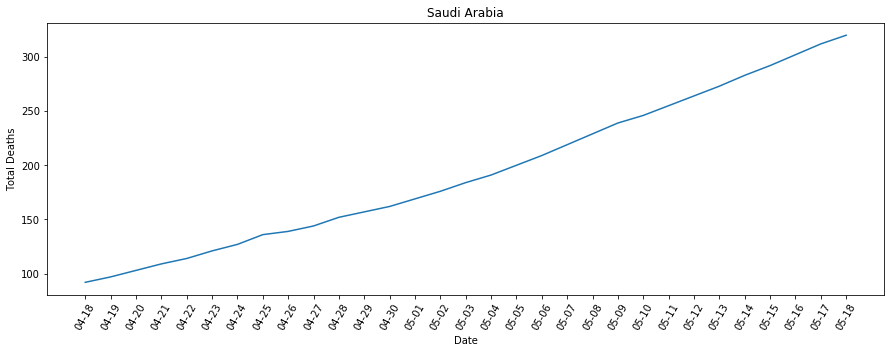

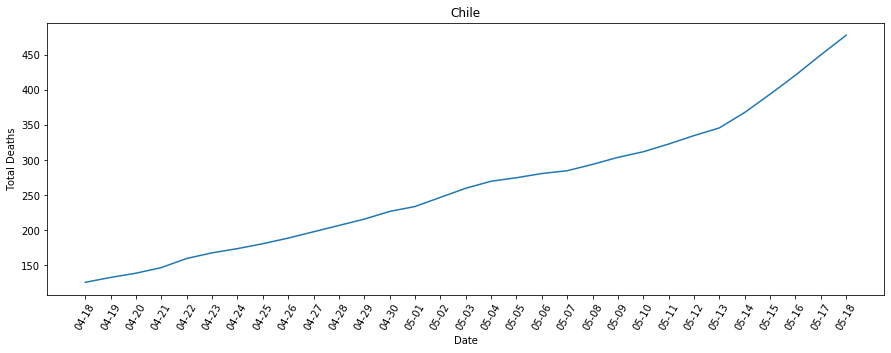

In [630]:
################### Timely view  of Deaths occured in each country #############################
for i in coun:
    df_=covid_data[covid_data['Country']==i]
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=60)
    plt.title(i)
    sb.lineplot(x='Date',y='Total Deaths',data=df_)

* USA has linear Death rate
* Some countries suffered very poorly with hyperbolic increase in Death rate like France,Italy,Spain,Turkey,belgium

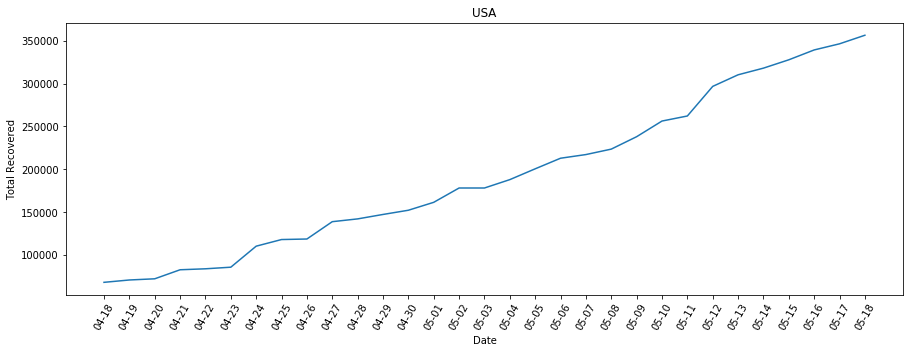

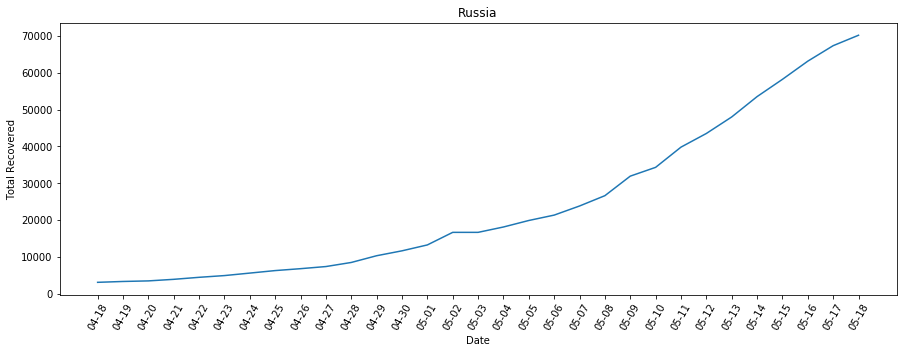

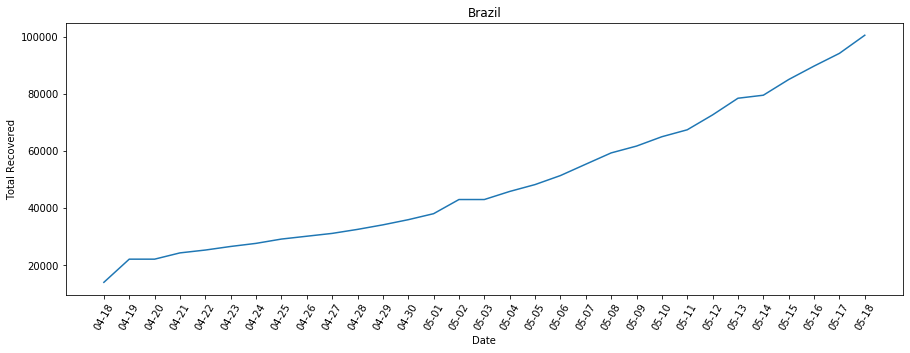

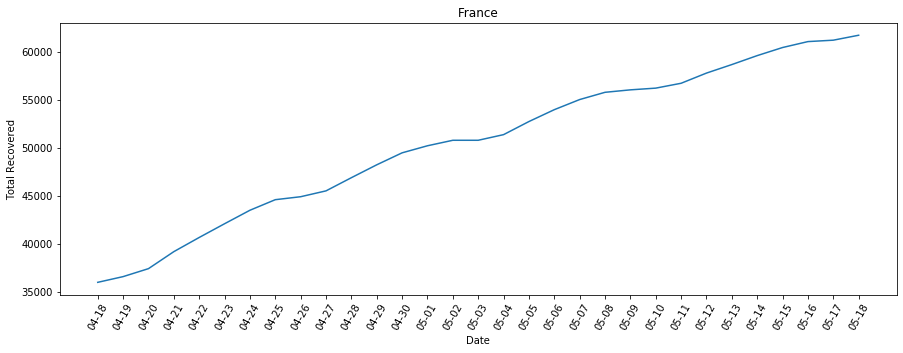

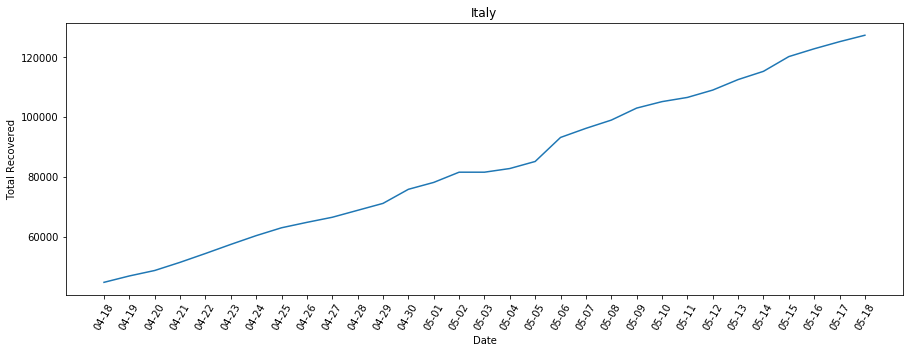

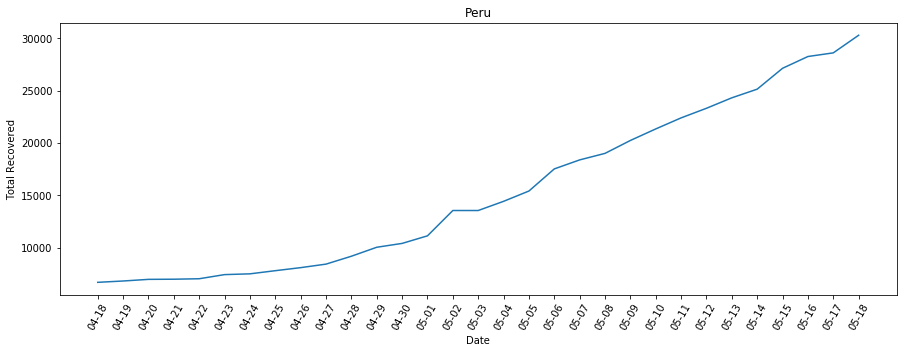

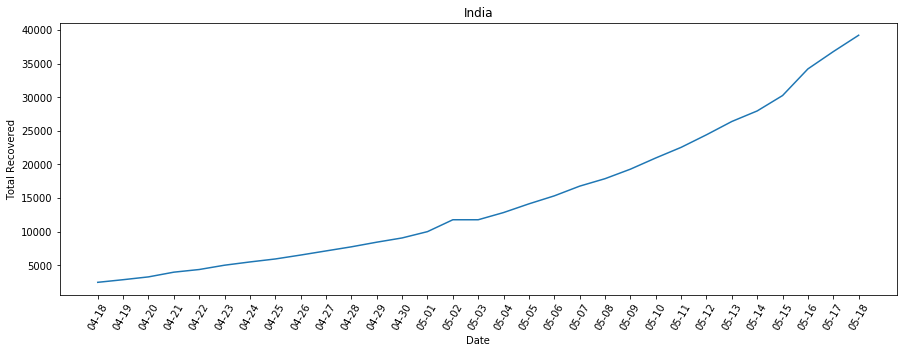

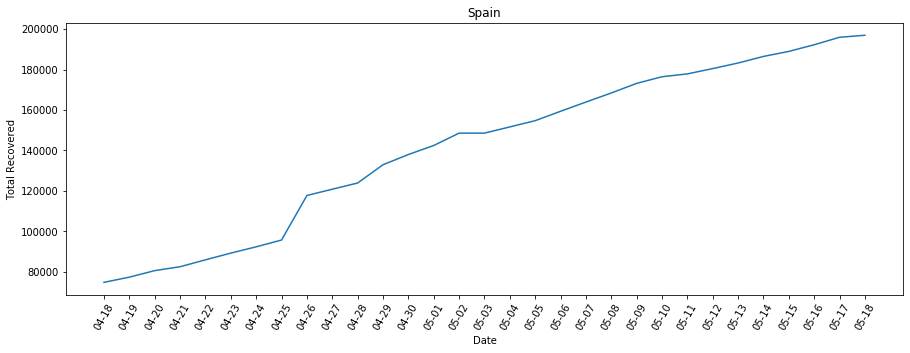

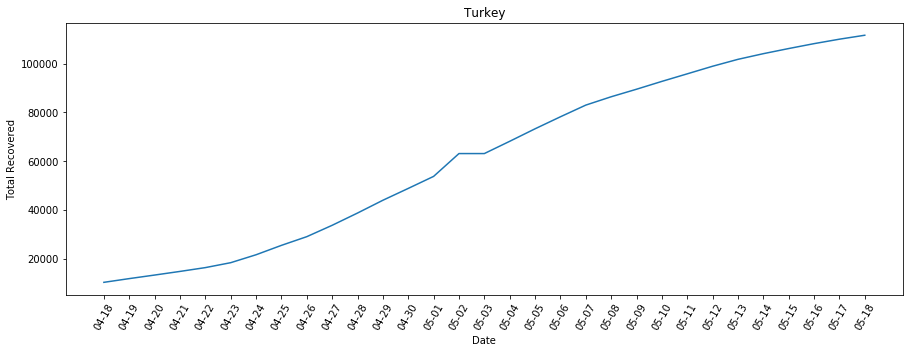

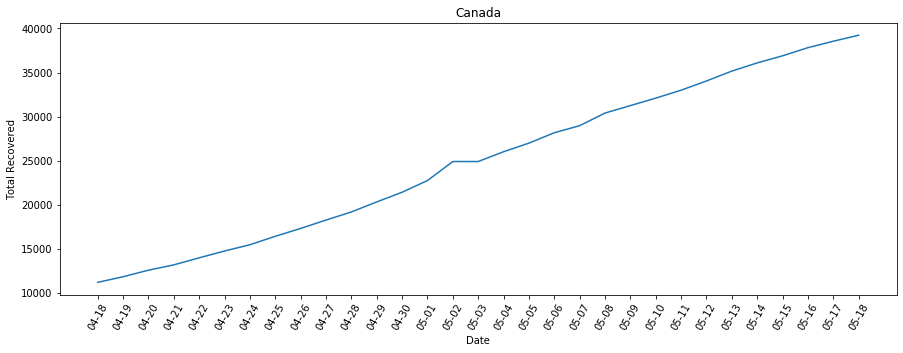

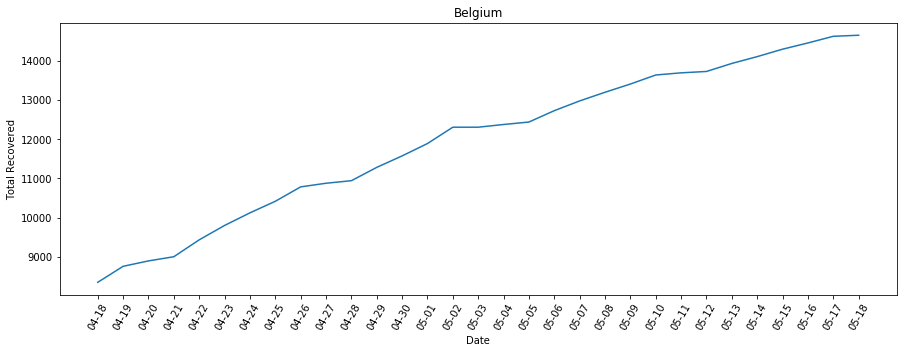

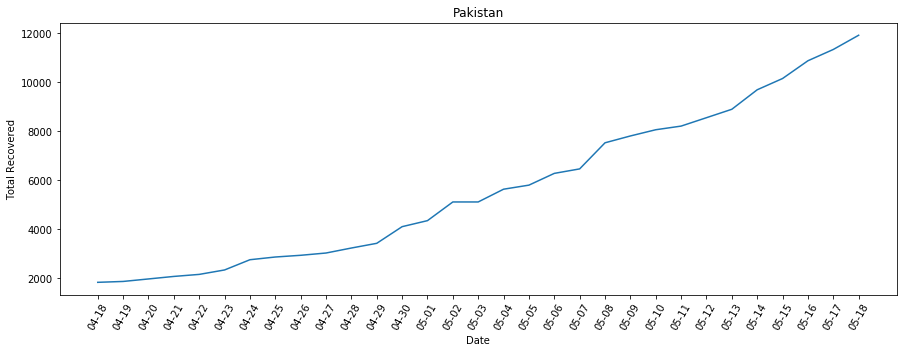

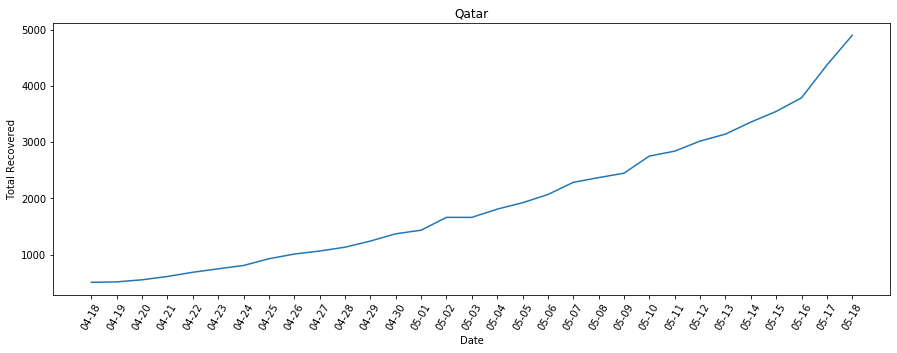

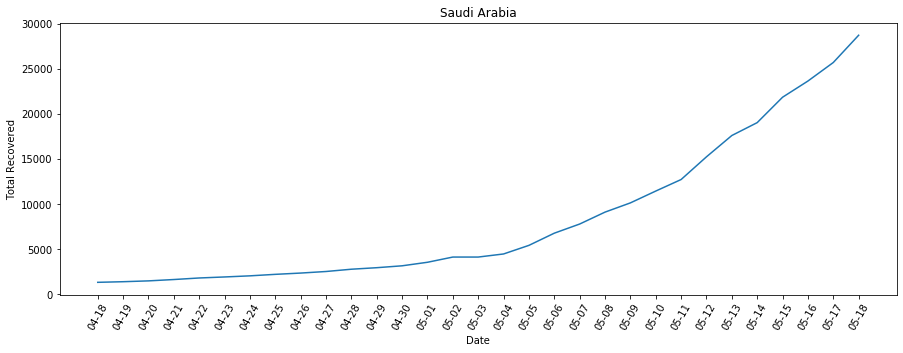

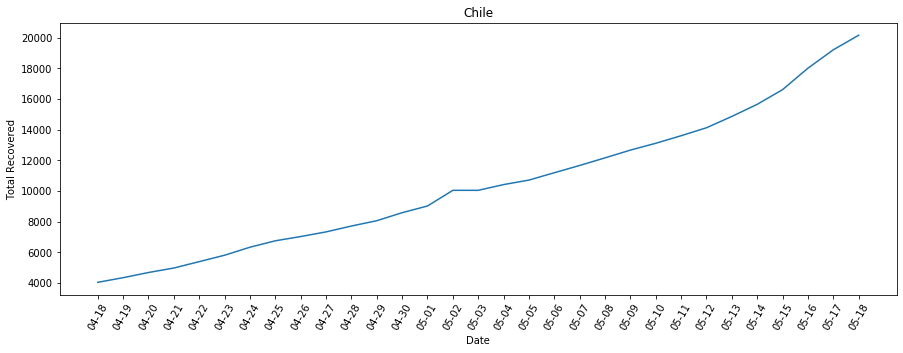

In [631]:
################### Timely view  of Recovery rate in each country #############################
for i in coun:
    df_=covid_data[covid_data['Country']==i]
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=60)
    plt.title(i)
    sb.lineplot(x='Date',y='Total Recovered',data=df_)

* USA is having exponential recovery rate
* Saudi Arabia's recovery rate is very poor from 04-18 to 05-04 

         Country  Fraction age 0-14 years
19      Pakistan                    0.348
10         India                    0.278
11          Peru                    0.274
14  Saudi Arabia                    0.252
8         Turkey                    0.250
3         Brazil                    0.217
17         Chile                    0.203
0            USA                    0.189
6         France                    0.181
1         Russia                    0.176
15       Belgium                    0.171
13        Canada                    0.160
2          Spain                    0.147
20         Qatar                    0.139
5          Italy                    0.135


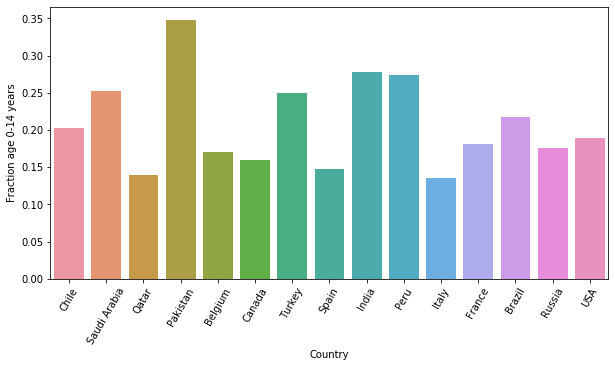

In [655]:
for i in  coun:
    df=covid_data_age[covid_data_age['Country']==i]
    df_=pd.concat([df,df_])
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sb.barplot(x='Country',y='Fraction age 0-14 years',data=df_)
print(df_[['Country','Fraction age 0-14 years']].head(15).sort_values('Fraction age 0-14 years',ascending=False))

* Highest fraction of 0-14 years people is in pakistan followed by India

         Country  Fraction age 15-64 years
20         Qatar                     0.848
14  Saudi Arabia                     0.715
3         Brazil                     0.697
17         Chile                     0.686
1         Russia                     0.682
13        Canada                     0.670
8         Turkey                     0.669
10         India                     0.662
2          Spain                     0.659
0            USA                     0.657
11          Peru                     0.655
15       Belgium                     0.643
5          Italy                     0.635
6         France                     0.622
19      Pakistan                     0.607


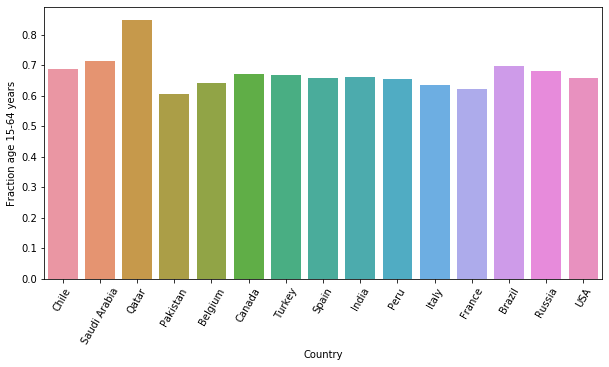

In [657]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sb.barplot(x='Country',y='Fraction age 15-64 years',data=df_)
print(df_[['Country','Fraction age 15-64 years']].head(15).sort_values('Fraction age 15-64 years',ascending=False))

* Highest fraction of 15-64 years people is in Qatar followed by saudi Arabia

         Country  Fraction age 65+ years
5          Italy                   0.230
6         France                   0.197
2          Spain                   0.194
15       Belgium                   0.186
13        Canada                   0.170
0            USA                   0.154
1         Russia                   0.142
17         Chile                   0.111
3         Brazil                   0.086
8         Turkey                   0.082
11          Peru                   0.072
10         India                   0.060
19      Pakistan                   0.045
14  Saudi Arabia                   0.033
20         Qatar                   0.013


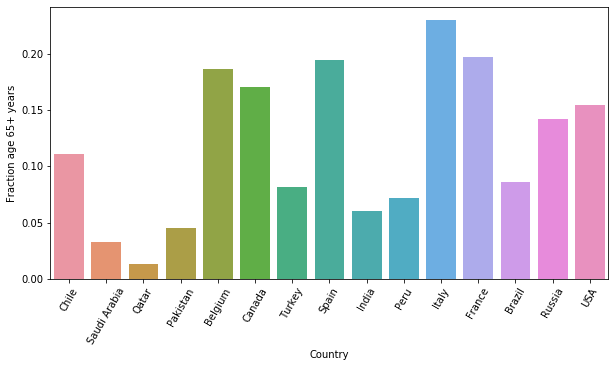

In [658]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sb.barplot(x='Country',y='Fraction age 65+ years',data=df_)
print(df_[['Country','Fraction age 65+ years']].head(15).sort_values('Fraction age 65+ years',ascending=False))

* Highest fraction of 65+ fraction of people is in Italy

In [671]:
covid_datawithage=Covid_data.copy()
covid_datawithage=covid_datawithage[covid_datawithage['Date']=='05-18']

In [675]:
covid_datawithage['Fraction 0-14']=covid_data_age['Fraction age 0-14 years']
covid_datawithage['Fraction 15-64']=covid_data_age['Fraction age 15-64 years']
covid_datawithage['Fraction65+']=covid_data_age['Fraction age 65+ years']

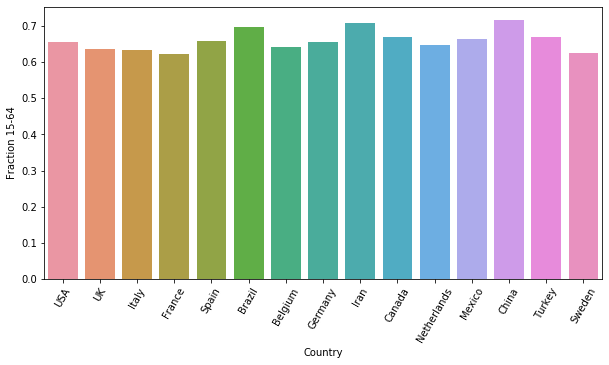

In [683]:
################# viewing Age 15-64 fraction with respect to countries by sorting on deth count ####################
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sb.barplot(y='Fraction 15-64',x='Country',data=covid_datawithage.sort_values('Total Deaths',ascending=False).head(15))

* We can see that top 15 countries where Deaths are highest have approx same fraction of age 15-64.This indicates people with 15-64 fractional age are dying more in number

In [664]:
Covid_data.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,04-18,UK,67844241,460437.0,114217.0,15464.0,344.0,1559.0,98409.0


In [ ]:
cv_data=Covid_data.dropna(axis=0)

#### Label Encoding String values:

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(cv_data['Country'])
cv_data['Country']=le.transform(cv_data['Country'])
cv_data['Serious or Critical']=cv_data['Serious or Critical'].round()

In [ ]:
cv_data.iloc[:,1:].skew()

##### Since all rows in dataset are containing vital inforamtion about particular country on given time ,we will not be removing outliers since that will lead to loss of data instead we will normalize the data and work on it

#### Dealing with Skewness:

In [ ]:
from sklearn.preprocessing import PowerTransformer
k=0
pt=[]
for i in cv_data.iloc[:,1:].columns:
    if((cv_data[i].skew()>0.55) & (i!='Total Recovered')):
        pt.append(PowerTransformer())
        pt[k].fit(cv_data[i].values.reshape(-1,1))
        cv_data[i]=pt[k].transform(cv_data[i].values.reshape(-1,1))
        k=k+1
cv_data['Total Recovered']=np.cbrt(cv_data['Total Recovered'])

In [ ]:
cv_data.iloc[:,1:].skew()

* Skewness is handled

In [ ]:
x=cv_data.drop(['Date','Total Deaths'],axis=1)
y=cv_data['Total Deaths']

#### Scaling feature

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
mm=MinMaxScaler()
ss.fit(x)
mm.fit(x)
x_mm=mm.transform(x)
x_ss=ss.transform(x)

#### Model Preparation:

In [684]:
#importing libraries for model
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [685]:
# preparing a method to get metric at best random state
def max_r2_score(x,y,test_size,model):
    max=0
    ind=0
    for i in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < r2_score(test_y,pred)):
                max=r2_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('max r2_score :',r2_score(test_y,pred),'at random state',ind)
    list_r2score.append(r2_score(test_y,pred))
    list_MSE.append(mean_squared_error(test_y,pred))
    list_MAE.append(mean_absolute_error(test_y,pred))
    list_RMSE.append(np.sqrt(mean_squared_error(test_y,pred)))
    score=cross_val_score(model,x,y,cv=5,scoring='r2')
    cross_val_r2Score.append(score.mean())

In [686]:
list_r2score=[]
list_MSE=[]
list_MAE=[]
list_RMSE=[]
cross_val_r2Score=[]
model_list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(alpha=0.1),
            Ridge(alpha=0.1),ElasticNet(),SVR()]
for i,k in zip(model_list,['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']):
    print('**********************************',k,'****************************************')
    max_r2_score(x_ss,y,0.25,i)

********************************** LinearRegression ****************************************
max r2_score : 0.8804926274449035 at random state 62
********************************** DecisionTree ****************************************
max r2_score : 0.9928863339157461 at random state 47
********************************** KNN ****************************************
max r2_score : 0.9981007572626204 at random state 90
********************************** Lasso ****************************************
max r2_score : 0.8516852597292266 at random state 62
********************************** Ridge ****************************************
max r2_score : 0.880488756922479 at random state 62
********************************** ElasticNet ****************************************
max r2_score : 0.508908834778766 at random state 83
********************************** SVR ****************************************
max r2_score : 0.9460488634497048 at random state 84


In [688]:
colv=['LinearReg','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']
performance_df=pd.DataFrame([list_r2score,cross_val_r2Score,list_MSE,list_RMSE,list_MAE],index=['R2','cross_val_r2Score','MSE','RMSE','MAE'],columns=colv)
performance_df

,LinearReg,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR
R2,0.880493,0.992886,0.998101,0.851685,0.880489,0.508909,0.946049
cross_val_r2Score,0.855071,0.942193,0.987733,0.829619,0.855069,0.483836,0.925261
MSE,0.119536,0.007391,0.001885,0.148351,0.119540,0.457035,0.055731
RMSE,0.345740,0.085971,0.043413,0.385163,0.345746,0.676043,0.236074
MAE,0.270166,0.024545,0.020543,0.309701,0.270178,0.549567,0.166876


#### Observation: Model are not overfitted

#### We cas see that KNearest Neighbors  is giving very good performance in all the metrices hence we will choose this as final model without going for hyperparameter tuning and ensemble techniques

#### Finalizing the model

In [689]:
model=KNeighborsRegressor()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=90)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('r2_score :',r2_score(test_y,pred))
list_r2score.append(r2_score(test_y,pred))
print(mean_squared_error(test_y,pred))
print(mean_absolute_error(test_y,pred))
print(np.sqrt(mean_squared_error(test_y,pred)))
model

r2_score : 0.9963480354636844
0.0036239794632394943
0.024405938829029382
0.06019949720088611


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [690]:
from sklearn.externals import joblib
joblib.dump(model,'country_wide_covid_predictor.obj')

['country_wide_covid_predictor.obj']